In [14]:
from math import sin,pi
from numpy import array,arange,sqrt,sin,cos,power,abs
import matplotlib.pyplot as plt
from scipy import integrate,constants

g=constants.g
l=0.1
om0=sqrt(g/l)
f=om0/(2.e0*pi)
T=1./f
print(T)

def f(t,r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = T*130
N = 50000
h = (b-a)/N


0.634482328311


In [15]:
from scipy.integrate import ode
y0, t0 = [1.0j, 2.0], 0
#def f(t, y):
#    return [1j*2.0*y[0] + y[1], -2.0*y[1]**2]

def jac(t, y):
    return [[2.0, 1], [0, -2.0*2*y[1]]]

In [19]:
r = ode(f, jac=None).set_integrator('zvode', method='bdf')
r.set_initial_value([3.0,0], 0)
t1 = 130*T
dt = 0.01
r.integrate(r.t+dt)
tarr=[0.0]
tharr=[3.0]
while r.successful() and r.t < t1:
 #   print(r.t+dt, r.integrate(r.t+dt))
    tarr.append(r.t+dt)
    tharr.append(r.integrate(r.t+dt)[0])

/Users/dgrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


In [20]:
plt.plot(tarr,tharr)

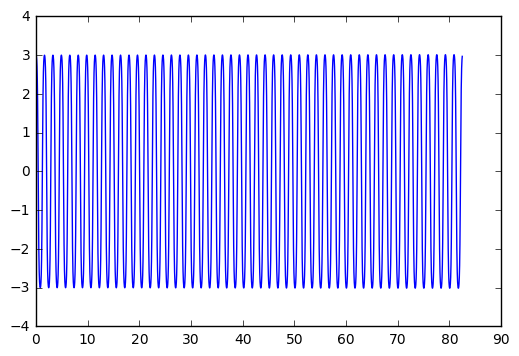

In [21]:
plt.show()

0.634482328311


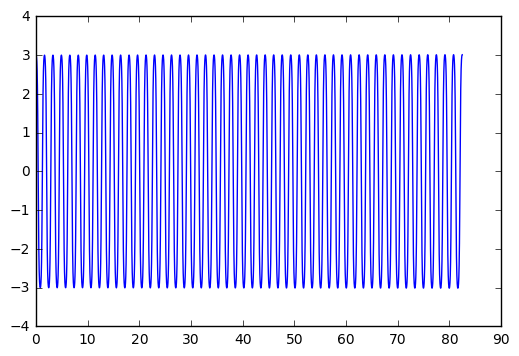

In [23]:
from math import sin,pi
from numpy import array,arange,sqrt,sin,cos,power,abs,real
import matplotlib.pyplot as plt
from scipy import integrate,constants

g=constants.g
l=0.1
om0=sqrt(g/l)
f=om0/(2.e0*pi)
T=1./f
print(T)

def f(t,r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = T*130
N = 50000
h = (b-a)/N
from scipy.integrate import ode
r = ode(f, jac).set_integrator('vode', method='bdf')
r.set_initial_value([3.0,0], 0)
t1 = 130*T
dt = t1/N
r.integrate(r.t+dt)
tarr=[0.0]
tharr=[3.0]
omarr=[0]
while r.successful() and r.t < t1:
 #   print(r.t+dt, r.integrate(r.t+dt))
    tarr.append(r.t+dt)
    tharr.append(r.integrate(r.t+dt)[0])
    omarr.append(r.integrate(r.t+dt)[1])
import matplotlib.pyplot as plt
plt.plot(tarr,tharr)
energy_scipy=(0.5e0)*power(real(omarr),2)*l*l+g*l*(1.-cos(real(tharr)))

plt.show()

In [24]:
energy_scipy
etot=g*l*(1.-cos(real(3.)))


In [29]:
plt.plot(tarr,abs(energy_scipy-etot))
plt.xscale('log')
plt.yscale('log')

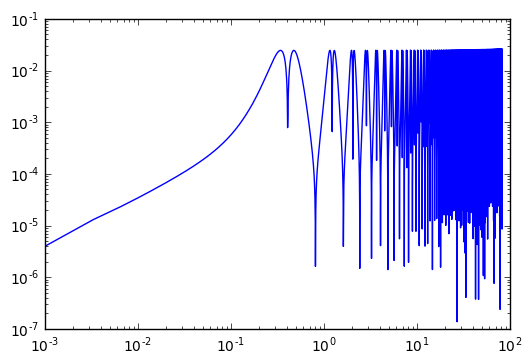

In [30]:
plt.show()